In [280]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import COASTLINE, LAND

bad_value = -999 

In [281]:
def read_dataset(name):

    f = open(name)
    lines = f.readlines()
    lines = lines[7:]

    splitted_dict = {}

    for i in lines:
        i = i.strip()
        line = re.split(r'[\t\n]',i)
        if (line[-1].find("** line too long **")) or (line[-1] == "** line too long **"):
            line.pop() 
        
        temp = []
        for j in range(1, len(line)):
            temp.append(float(line[j]))
            
        splitted_dict[line[0]] = temp
    
    rain = []
    for i in splitted_dict.keys():
        temp = []
        j = 0
        while (j<len(splitted_dict[i])):
            temp.append(splitted_dict[i][j])
            j+=1
        while (j<1440):
            temp.append(bad_value)
            j+=1
        rain.append(temp)
        

    rain = np.array(rain)
    return rain

In [282]:
def get_color_plot(rain, colormap):

    rain_masked = ma.masked_where(rain == bad_value, rain)
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},figsize=(20,15))

    scale = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.16, 0.22, 0.3, 30]
    norm = mcolors.BoundaryNorm(scale, len(scale)-1)
    cmap = cm.get_cmap(colormap)
    colors = []
    factor = 1/(len(scale)-1)

    for i in range(0, len(scale)):
        colors.append(cmap(i*factor))

    cmap=mcolors.ListedColormap(colors)
    im = ax.imshow(rain_masked, cmap=cmap, extent=(-180, 180, -90, 90), origin='lower', transform=ccrs.PlateCarree(central_longitude=180), norm=norm)

    cbar = plt.colorbar(im, ax=ax, orientation='vertical', shrink=0.6)
    cbar.set_label('Rain')

    ax.add_feature(COASTLINE, linewidth=0.5, edgecolor='black')
    ax.add_feature(LAND,facecolor='lightyellow')

    ax.gridlines(draw_labels=True)
    ax.gridlines(xlocs=range(-180, 181, 30), ylocs=range(-90, 91, 30), linestyle='--', color='k')
    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

    plt.show()

/tmp/ipykernel_9281/2368300265.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(colormap)


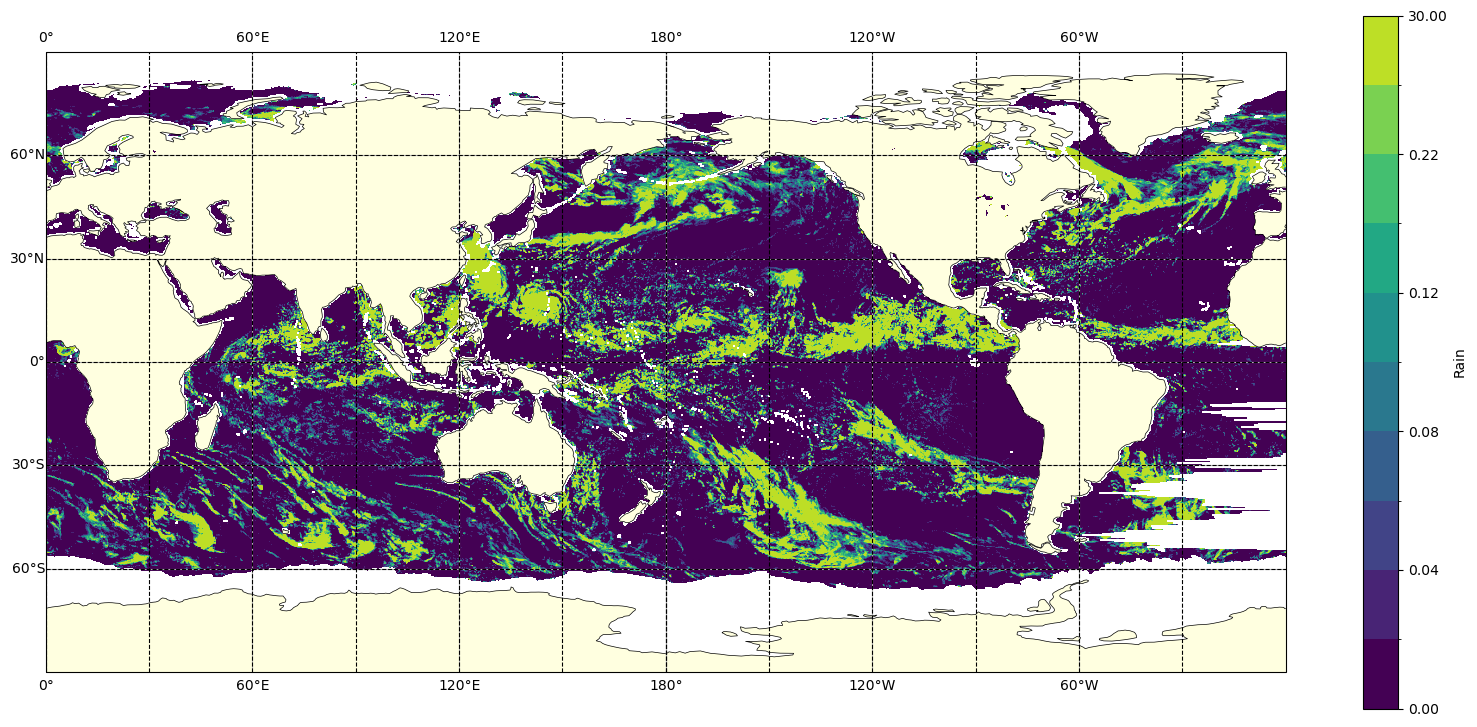

In [283]:
rain = read_dataset("./dataset/11_Jul_2015.txt")
get_color_plot(rain, 'viridis')